In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
pre_df = pd.read_csv('../../data/cleaned/cleaned_vessel_calls.csv')

In [65]:
# preprocess dataframe - duration and month
pre_df["arrivalDate"] = pd.to_datetime(pre_df["arrivalDate"])
pre_df["sailingDate"] = pd.to_datetime(pre_df["sailingDate"])
pre_df["duration"] = pd.to_datetime(pre_df["sailingDate"]) - pd.to_datetime(pre_df["arrivalDate"])
pre_df["month"] = pre_df["arrivalDate"].dt.month

In [66]:
pre_df['duration'] = pre_df['duration'] / pd.Timedelta(days=1)

In [67]:
# drop null values in df
pre_df.dropna(inplace=True)

In [68]:
# preprocess data
# sort by imo number
pre_df.sort_values(by=["IMO", "arrivalDate"], inplace=True)
pre_df['next_unlocode'] = pre_df.groupby('IMO')['place.unlocode'].shift(-1)
pre_df['is_last_imo'] = pre_df['IMO'] != pre_df['IMO'].shift(-1)
pre_df = pre_df[~pre_df["is_last_imo"]]
pre_df = pre_df[pre_df["Event_Type"] != "ARRIVAL"]

In [69]:
pre_df.columns

Index(['arrivalDate', 'sailingDate', 'place.placeName', 'place.unlocode',
       'place.placeType', 'place.countryName', 'Timestamp', 'Event_Type',
       'IMO', 'vessel.vesselName', 'vessel.vesselType', 'duration', 'month',
       'next_unlocode', 'is_last_imo'],
      dtype='object')

In [70]:
pre_df

,arrivalDate,sailingDate,place.placeName,place.unlocode,place.placeType,place.countryName,Timestamp,Event_Type,IMO,vessel.vesselName,vessel.vesselType,duration,month,next_unlocode,is_last_imo
314761,2023-01-18 14:10:05,2023-01-26 04:05:00,Los Angeles,USLAX,Port,United States of America,2023-01-26T04:05:00,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),7.579803,1,CNJGY,False
314763,2023-02-22 07:17:58,2023-02-23 18:56:16,Jiangyin,CNJGY,Port,People's Republic of China,2023-02-23T18:56:16,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.484931,2,CNTXG,False
314765,2023-03-02 16:00:39,2023-03-03 12:31:09,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,2023-03-03T12:31:09,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.854514,3,CNQAW,False
314767,2023-03-04 21:02:13,2023-03-05 11:45:29,Qianwan,CNQAW,Sub Port,People's Republic of China,2023-03-05T11:45:29,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.613380,3,CNMSN,False
314769,2023-03-06 23:30:18,2023-03-08 00:00:46,Meishan,CNMSN,Sub Port,People's Republic of China,2023-03-08T00:00:46,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.021157,3,CNNSA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,2023-09-05 05:50:48,2023-09-06 02:46:03,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,2023-09-06T02:46:03,DEPARTURE,9951135,Asterios,fully cellular containership,0.871701,9,INMAA,False
12571,2023-09-10 16:43:35,2023-09-11 20:02:20,Chennai (ex Madras),INMAA,Port,India,2023-09-11T20:02:20,DEPARTURE,9951135,Asterios,fully cellular containership,1.138021,9,BDCGP,False
12573,2023-09-15 05:31:56,2023-09-17 05:28:29,Chittagong (Chattogram),BDCGP,Port,Bangladesh,2023-09-17T05:28:29,DEPARTURE,9951135,Asterios,fully cellular containership,1.997604,9,THLCH,False
12575,2023-09-24 15:15:36,2023-09-25 08:23:38,Laem Chabang,THLCH,Port,Thailand,2023-09-25T08:23:38,DEPARTURE,9951135,Asterios,fully cellular containership,0.713912,9,SGSIN,False


In [71]:
pre_df = pre_df.drop(columns=["is_last_imo", "Event_Type", "Timestamp", "vessel.vesselName", "IMO", "arrivalDate", "sailingDate"])
pre_df

,place.placeName,place.unlocode,place.placeType,place.countryName,vessel.vesselType,duration,month,next_unlocode
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,CNJGY
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,CNTXG
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,CNQAW
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,CNMSN
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,CNNSA
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,INMAA
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,BDCGP
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,THLCH
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,SGSIN


In [72]:
df = pre_df.rename(columns={'place.unlocode':'current_unlocode', 'place.placeName':'port_name','vessel.vesselType':'vessel_type', 'place.placeType': 'place_type', 'place.countryName': 'country_name'})
df

,port_name,current_unlocode,place_type,country_name,vessel_type,duration,month,next_unlocode
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,CNJGY
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,CNTXG
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,CNQAW
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,CNMSN
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,CNNSA
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,INMAA
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,BDCGP
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,THLCH
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,SGSIN


In [73]:
# currently using only one vessel type
df = df[df['vessel_type'] == 'vehicle carrier']
# drop vessel_type column
df = df.drop(columns=['vessel_type'])

In [74]:
# data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38120 entries, 272437 to 134999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   port_name         38120 non-null  object 
 1   current_unlocode  38120 non-null  object 
 2   place_type        38120 non-null  object 
 3   country_name      38120 non-null  object 
 4   duration          38120 non-null  float64
 5   month             38120 non-null  int32  
 6   next_unlocode     38120 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 2.2+ MB


In [75]:
# print out the stats related to port appearance
print(df['current_unlocode'].value_counts().describe())

count     360.000000
mean      105.888889
std       196.158579
min         1.000000
25%         7.000000
50%        31.000000
75%       117.250000
max      1630.000000
Name: count, dtype: float64


In [76]:
# Calculate frequency of each port for thresholding
port_counts = pd.concat([df['current_unlocode'], df['next_unlocode']]).value_counts()

threshold = 1000
print(threshold)

# Filter ports that meet the threshold
valid_ports_df = port_counts[port_counts >= threshold]
valid_ports = port_counts[port_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_df = df[(df['current_unlocode'].isin(valid_ports)) & (df['next_unlocode'].isin(valid_ports))]
valid_ports_df


1000


JPYOK     3266
JPNGO     3145
SGSIN     2917
PA PCN    1707
BEZEE     1522
CNSGH     1505
THLCH     1413
KRPTK     1386
JPTHS     1355
DEBRV     1185
JPHIJ     1176
JPUKB     1117
USBAL     1101
Name: count, dtype: int64

In [77]:
# uniqueness check
print(len(valid_ports))
print(len(set(valid_ports)))

13
13


In [78]:
# value counts of filtered_df
vc_filtered_df = pd.concat([filtered_df['current_unlocode'], filtered_df['next_unlocode']]).value_counts()
vc_filtered_df

JPNGO     1927
JPYOK     1459
SGSIN      846
JPTHS      769
JPUKB      590
THLCH      580
CNSGH      497
DEBRV      426
BEZEE      410
KRPTK      352
JPHIJ      313
PA PCN     232
USBAL       79
Name: count, dtype: int64

In [79]:
# Select a certain number of samples for each port
# Initialize an empty list to store the rows before creating the final DataFrame
rows_to_add = []

# Track how many times each port has been added
port_usage = {port: 0 for port in valid_ports}

# Shuffle the data to randomize the sampling
filtered_df = filtered_df.sample(frac=1, random_state=42)

for _, row in filtered_df.iterrows():
    current_port = row['current_unlocode']
    next_port = row['next_unlocode']
    # Check if both ports in the row can still be added
    if port_usage[current_port] < 200 and port_usage[next_port] < 200:
        rows_to_add.append(row)
        # Update the usage count for both ports
        port_usage[current_port] += 1
        port_usage[next_port] += 1

        # Stop adding if both have reached the limit
        if all(count >= 100 for count in port_usage.values()):
            break

# Create the final DataFrame from the list of rows
balanced_df = pd.DataFrame(rows_to_add)

# Reset index after all operations
balanced_df = balanced_df.reset_index(drop=True)

# Print value counts to confirm balancing
df_bal_counts = pd.concat([balanced_df['current_unlocode'], balanced_df['next_unlocode']]).value_counts()
df_bal_counts.describe()
df_bal_counts

SGSIN     200
JPNGO     200
JPYOK     200
JPTHS     200
KRPTK     200
DEBRV     200
CNSGH     200
BEZEE     200
JPUKB     178
JPHIJ     172
THLCH     161
PA PCN    130
USBAL      49
Name: count, dtype: int64

In [80]:
print(df_bal_counts.describe())
df_bal_counts.quantile(0.15)

count     13.000000
mean     176.153846
std       43.872630
min       49.000000
25%      172.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: count, dtype: float64


154.79999999999998

In [81]:
threshold = 200
# filter ports again to remove ports in balanced_df that are not above a certain threshold from df_bal_counts
valid_ports_bal_df = df_bal_counts[df_bal_counts >= threshold]
valid_ports_bal = df_bal_counts[df_bal_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_bal_df = balanced_df[(balanced_df['current_unlocode'].isin(valid_ports_bal)) & (balanced_df['next_unlocode'].isin(valid_ports_bal))]
valid_ports_bal_df

SGSIN    200
JPNGO    200
JPYOK    200
JPTHS    200
KRPTK    200
DEBRV    200
CNSGH    200
BEZEE    200
Name: count, dtype: int64

In [82]:
df = filtered_bal_df

In [83]:
filtered_bal_df

,port_name,current_unlocode,place_type,country_name,duration,month,next_unlocode
1,"Nagoya, Aichi",JPNGO,Port,Japan,0.898484,2,JPYOK
2,Singapore,SGSIN,Port,Republic of Singapore,0.507303,10,CNSGH
4,Singapore,SGSIN,Port,Republic of Singapore,0.440660,12,CNSGH
6,Yokohama,JPYOK,Port,Japan,1.472477,1,JPNGO
7,Singapore,SGSIN,Port,Republic of Singapore,0.498113,1,CNSGH
...,...,...,...,...,...,...,...
1074,Pyeongtaek,KRPTK,Port,Republic of Korea,0.784780,10,CNSGH
1075,Pyeongtaek,KRPTK,Port,Republic of Korea,2.793345,9,KRPTK
1076,Shanghai,CNSGH,Port,People's Republic of China,0.497465,11,KRPTK
1078,Pyeongtaek,KRPTK,Port,Republic of Korea,0.280567,9,CNSGH


In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
label_encoders = {}
for column in ['port_name', 'place_type', 'country_name']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

C:\Users\syeda\AppData\Local\Temp\ipykernel_41084\4060431992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_41084\4060431992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_41084\4060431992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [85]:
# manually map everything to integers for unlocode
# Combine both columns to find all unique ports
all_ports = pd.concat([df['current_unlocode'], df['next_unlocode']])

# Create unique identifiers for each port
unique_ports = all_ports.unique()
port_to_id = {port: i for i, port in enumerate(unique_ports)}

df['encoded_current_unlocode'] = df['current_unlocode'].map(port_to_id)
df['encoded_next_unlocode'] = df['next_unlocode'].map(port_to_id)

# Print the first few rows of the DataFrame to verify the encoding
print(df.head())


   port_name current_unlocode  place_type  country_name  duration  month  \
1          1            JPNGO           0             2  0.898484      2   
2          4            SGSIN           0             5  0.507303     10   
4          4            SGSIN           0             5  0.440660     12   
6          6            JPYOK           0             2  1.472477      1   
7          4            SGSIN           0             5  0.498113      1   

  next_unlocode  encoded_current_unlocode  encoded_next_unlocode  
1         JPYOK                         0                      2  
2         CNSGH                         1                      5  
4         CNSGH                         1                      5  
6         JPNGO                         2                      0  
7         CNSGH                         1                      5  


C:\Users\syeda\AppData\Local\Temp\ipykernel_41084\2382646095.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_current_unlocode'] = df['current_unlocode'].map(port_to_id)
C:\Users\syeda\AppData\Local\Temp\ipykernel_41084\2382646095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_next_unlocode'] = df['next_unlocode'].map(port_to_id)


In [86]:
ports = df[['current_unlocode', 'encoded_current_unlocode', 'next_unlocode', 'encoded_next_unlocode']]
ports

,current_unlocode,encoded_current_unlocode,next_unlocode,encoded_next_unlocode
1,JPNGO,0,JPYOK,2
2,SGSIN,1,CNSGH,5
4,SGSIN,1,CNSGH,5
6,JPYOK,2,JPNGO,0
7,SGSIN,1,CNSGH,5
...,...,...,...,...
1074,KRPTK,4,CNSGH,5
1075,KRPTK,4,KRPTK,4
1076,CNSGH,5,KRPTK,4
1078,KRPTK,4,CNSGH,5


In [87]:
df = df.drop(columns=['current_unlocode', 'next_unlocode'])

In [88]:
df = df.drop(columns=['place_type'])

In [89]:
# Prepare features and target variable
X = df.drop(['encoded_next_unlocode'], axis=1)
y = df['encoded_next_unlocode']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train

array([[1.        , 0.        , 0.12947149, 0.45454545, 0.85714286],
       [0.28571429, 0.8       , 0.05144745, 0.90909091, 0.57142857],
       [0.14285714, 0.4       , 0.16322612, 0.09090909, 0.        ],
       ...,
       [0.14285714, 0.4       , 0.04522233, 0.63636364, 0.        ],
       [1.        , 0.        , 0.16097769, 0.18181818, 0.85714286],
       [0.14285714, 0.4       , 0.04638109, 0.90909091, 0.        ]])

In [92]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
#                        min_samples_split=10, n_estimators=500, random_state=42)

# model.fit(X_train, y_train)

In [93]:
from sklearn.metrics import accuracy_score
# # Make predictions
# y_pred = model.predict(X_test)
 
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

In [94]:
# print('Training Accuracy : ', 
#       accuracy_score(y_train,
#                              model.predict(X_train))*100)
# print('Validation Accuracy : ', 
#       accuracy_score(y_test, 
#                              model.predict(X_test))*100)

In [95]:
print(y_test)
print(y_train)

49      3
474     2
280     0
323     5
599     3
       ..
1059    4
364     5
133     0
220     4
680     7
Name: encoded_next_unlocode, Length: 119, dtype: int64
244    7
988    3
207    2
784    6
452    0
      ..
113    1
165    7
425    2
753    7
161    3
Name: encoded_next_unlocode, Length: 475, dtype: int64


In [96]:
y_test

49      3
474     2
280     0
323     5
599     3
       ..
1059    4
364     5
133     0
220     4
680     7
Name: encoded_next_unlocode, Length: 119, dtype: int64

In [97]:
# Trying to use RandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
model = RandomForestClassifier(random_state=42)

# Setup the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['sqrt', 'log2', None]  # Corrected from 'auto' to 'sqrt'
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1,
                                   error_score='raise')  # Adding error_score='raise' to get clearer error messages

try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print("Error during fitting:", e)


# Evaluate the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, train_predictions) * 100)
print('Validation Accuracy : ', accuracy_score(y_test, test_predictions) * 100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Training Accuracy :  76.42105263157895
Validation Accuracy :  54.621848739495796


In [98]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300, random_state=42)


In [99]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_search.best_estimator_.feature_importances_}
).sort_values("importance", ascending=False)


# Display
feature_importances_df

,feature,importance
1,country_name,0.248393
4,encoded_current_unlocode,0.223074
0,port_name,0.222622
2,duration,0.194952
3,month,0.110959


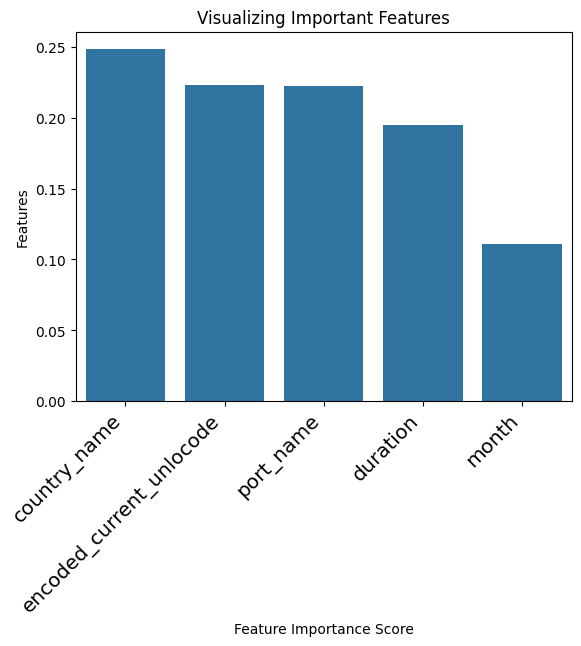

In [100]:
# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Setup the parameter grid based on the best parameters from RandomizedSearchCV
param_grid = {
    'n_estimators': [400, 450, 500, 550, 600],
    'max_depth': [15, 20, 25],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Evaluate the best model found by GridSearchCV
best_model = grid_search.best_estimator_
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, train_predictions) * 100)
print('Validation Accuracy : ', accuracy_score(y_test, test_predictions) * 100)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


c:\Users\syeda\OneDrive\Documents\American Bureau of Shipping\projects\ais_port_prediction\nn_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Accuracy :  76.63157894736841
Validation Accuracy :  56.30252100840336
RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=400, random_state=42)
